# Titanic Survival

First let's get some preliminary things done first. We'll use pandas, numpy, and matplotlib to start off and also ignore warnings. I also loaded the csv into the variable `df`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
plt.style.use("ggplot")

df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Using `df.count()`, we can if there is any missing data. In this case, there are some missing values for Age and Embarked, and good chunk missing from from Cabin, so we'll ignore the cabin data in this exploration. To start off, we'll map Age and Embarked numbers to integers and fill all `nan` Age values with the median and all `nan` Embarked values with 2 (embarked from Southhampton).

In [2]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [3]:
sex_map = {"male": 0, "female":1}
embarked_map = {"C": 0, "Q": 1, "S": 2}
df["Sex"] = df["Sex"].replace(sex_map)
df["Embarked"] = df["Embarked"].replace(embarked_map)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(2)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


Now we can start to look at the data visually. Let's make some histograms looking at survival between different variables. The first one is perhaps the most obvious; survival by gender. From the graph, it is easy to see that most (~75%) females survived while only some (~25%) of the men survived, which follows the code of conduct of [women and children first](https://en.wikipedia.org/wiki/Women_and_children_first).

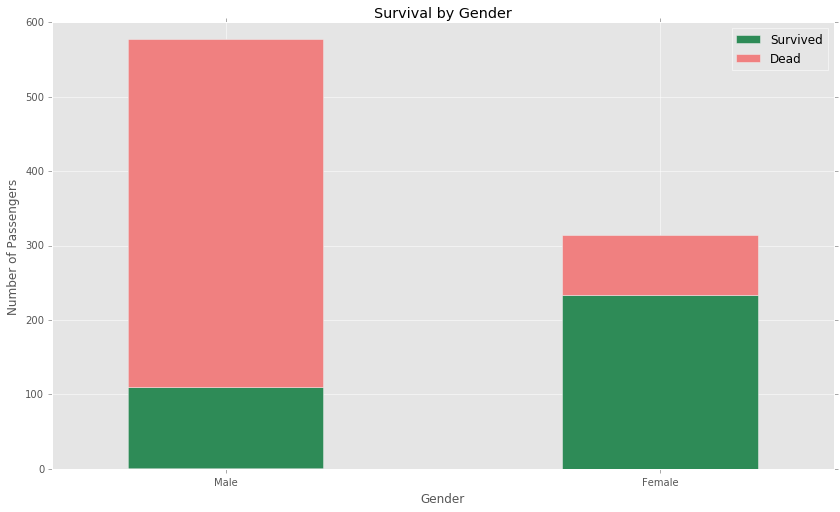

In [4]:
plt.figure(figsize=(14,8))
plt.hist([df.loc[df["Survived"] == 1, "Sex"], df.loc[df["Survived"] == 0, "Sex"]], 
         stacked=True,
         bins=range(3),
         align="left",
         color=["seagreen", "lightcoral"],
         rwidth=.45)
plt.title("Survival by Gender")
plt.ylabel("Number of Passengers")
plt.xlabel("Gender")
plt.xticks((0,1), ("Male", "Female"))
plt.legend(("Survived", "Dead"))

Next let's take a look at the survival by age. Once again, this also follows the conduct of women and children first. In the ages below 10, a majority of each bin is green, meaning that you are more likely to survive if you are younger. 

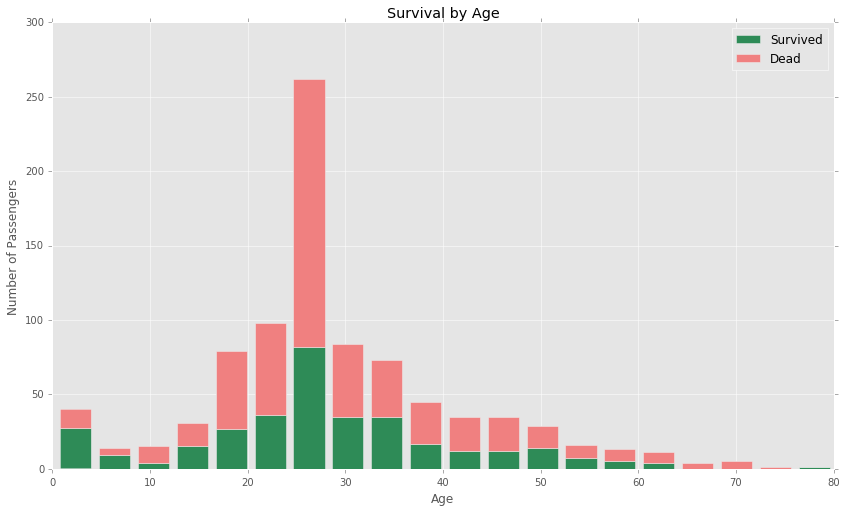

In [5]:
plt.figure(figsize=(14,8))
plt.hist([df.loc[df["Survived"] == 1, "Age"], df.loc[df["Survived"] == 0, "Age"]], 
         stacked=True,
         bins=20, 
         color=["seagreen", "lightcoral"])
plt.title("Survival by Age")
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.legend(("Survived", "Dead"))

Looking at the survival by fare, if you your fare was lest, you are less likely to survive. As the fare goes up, you are more likely to survive, which is consistent with the history of the Titantic.

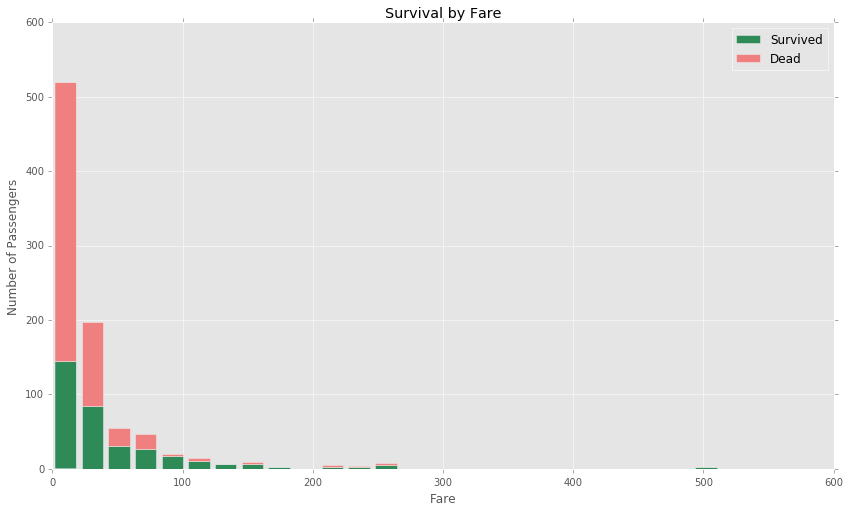

In [6]:
plt.figure(figsize=(14,8))
plt.hist([df.loc[df["Survived"] == 1, "Fare"], df.loc[df["Survived"] == 0, "Fare"]], 
         stacked=True,
         bins=25, 
         color=["seagreen", "lightcoral"])
plt.title("Survival by Fare")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.legend(("Survived", "Dead"))

One small tangent related to pandas is on the subject of selecting columns and something called chaining. The easiest way to describe see if you're chaining is when there are there is a left and right bracket back to back, which would indicate chaining. The developers generally recomend against chaining because it can yield unpredictable results as to whether a view of the data is returned or a copy of the data. Instead, use the `.loc` property to select certain rows and certain columns. Using `.loc` can also yield slightly better performance. The first code snippet is an example of accessing via chaining while the second example uses `.loc`.  

In [7]:
%timeit df[df["Survived"] == 1]["Fare"]

1000 loops, best of 3: 550 µs per loop


In [8]:
%timeit df.loc[df["Survived"] == 1, "Fare"]

1000 loops, best of 3: 241 µs per loop


Back to the analysis of data, let's take a look at survival by the class of the passenger. The classes are a general representation of the passenger's socioeconomic status, with first class being of the highest status and the third being the lowest. The data shows that you have a higher chance of surving the higher your class is.

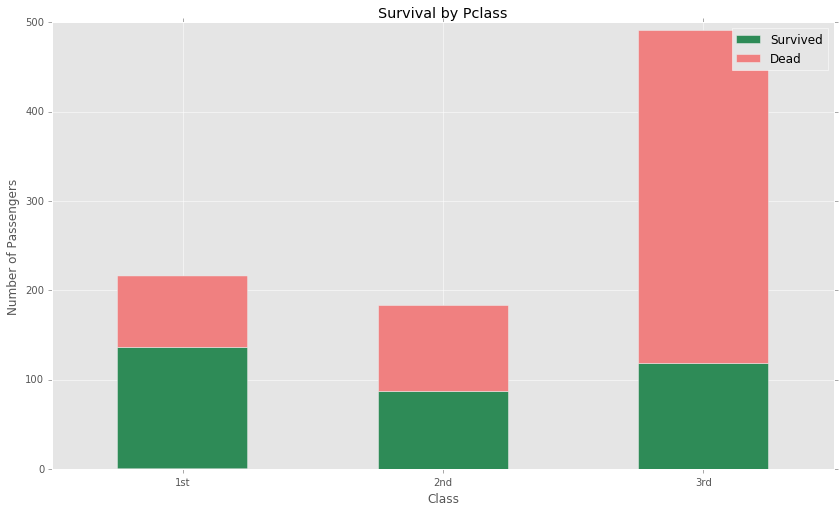

In [9]:
plt.figure(figsize=(14,8))
plt.hist([df.loc[df["Survived"] == 1, "Pclass"], df.loc[df["Survived"] == 0, "Pclass"]], 
         stacked=True,
         bins=np.arange(1,5), 
         color=["seagreen", "lightcoral"],
         align="left",
         rwidth=.5)
plt.title("Survival by Pclass")
plt.xlabel("Class")
plt.xticks((1,2,3),("1st", "2nd", "3rd"))
plt.ylabel("Number of Passengers")
plt.legend(("Survived", "Dead"))

This is also in line with our data if we take a look at a scatter plot of class vs fare. On average, first class pays more for their fare than second and third class.

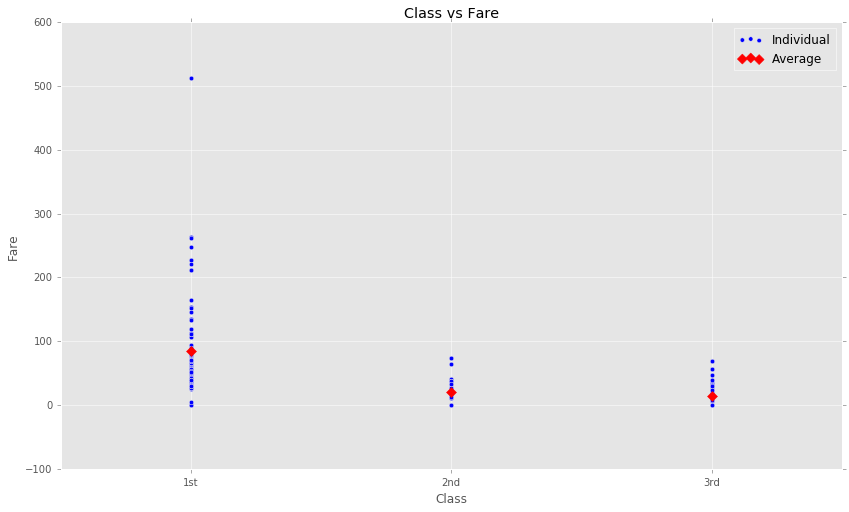

In [10]:
plt.figure(figsize=(14,8))
plt.scatter(df["Pclass"], df["Fare"])
plt.scatter((1,2,3), (df.loc[df["Pclass"] == 1, "Fare"].mean(), 
                      df.loc[df["Pclass"] == 2, "Fare"].mean(),
                      df.loc[df["Pclass"] == 3, "Fare"].mean()),
            color="r",
            marker="D",
            s=50)
plt.title("Class vs Fare")
plt.xlabel("Class")
plt.xticks((1,2,3),("1st", "2nd", "3rd"))
plt.ylabel("Fare")
plt.legend(("Individual", "Average"))

Another part of the data to look at is the name. The thing that all names have in common the data is they have a title. Let's extract those and find out their counts.

In [11]:
def create_titles(df):
    for name in df["Name"]:
        df.loc[df["Name"] == name, "Title"] = name[name.index(",") + 2:name.index(".")]
        
create_titles(df)
df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Capt              1
the Countess      1
Mme               1
Ms                1
Don               1
Lady              1
Jonkheer          1
Name: Title, dtype: int64

Mr, Miss, Mrs, and Master are the most common titles. Their are some miscellaneous titles that don't appear that much, so they will be disregarded in predictions. Something to improve uppon is to map these miscellaneous titles to the more common ones. For example Mme is French for Madame, which can be mapped to Mrs while Ms, an abbreviation for miss, can be mapped to Miss. For now, we will map each of these titles to a unique integer.

In [12]:
title_map = {t:i for i, t in enumerate(df["Title"].unique())}
df = df.replace(title_map)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,0


Now that we have titles mapped out, let's visualize them. Once again, this is consistent with the history, showing that women and children are much more likely to survive.

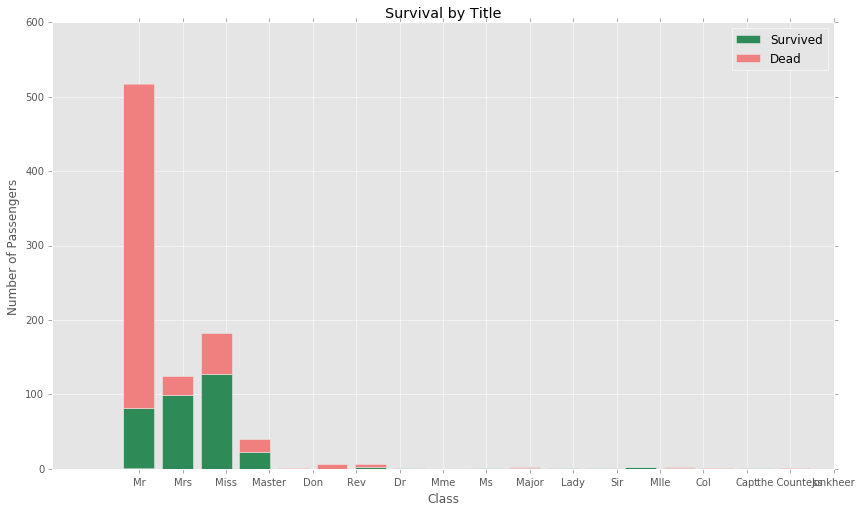

In [13]:
plt.figure(figsize=(14,8))
plt.hist([df.loc[df["Survived"] == 1, "Title"], df.loc[df["Survived"] == 0, "Title"]], 
         stacked=True,
         bins=np.array(len(title_map) + 1), 
         color=["seagreen", "lightcoral"],
         align="left")
plt.title("Survival by Title")
plt.xlabel("Class")
plt.xticks(list(title_map.values()),list(title_map.keys()))
plt.ylabel("Number of Passengers")
plt.legend(("Survived", "Dead"))

One more thing small improvement we can make is filling missing data for age. We originally just fill missing ages with the median, but we can do better. Every data point has a name, so it has a title. Titles have a correlation with age, as seen in the scatter plot below. 

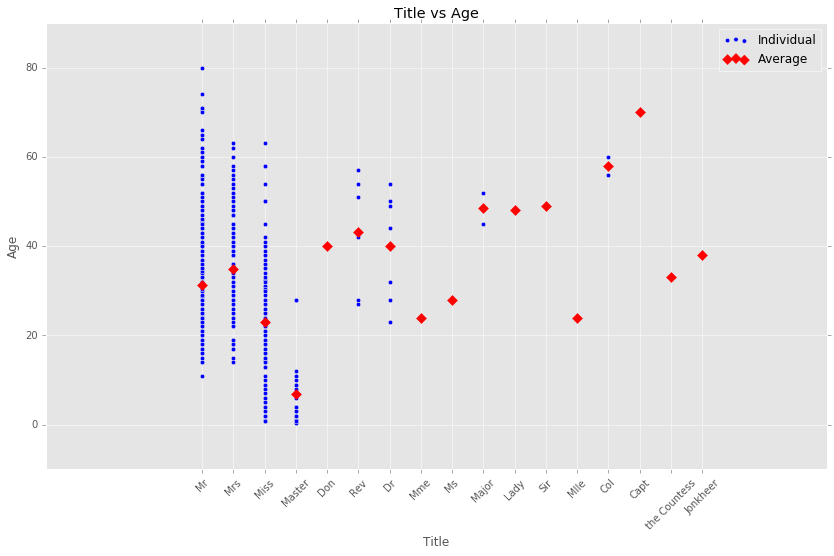

In [14]:
plt.figure(figsize=(14,8))
plt.scatter(df["Title"], df["Age"])
average_age = {v:df.loc[df["Title"] == v, "Age"].mean() for v in title_map.values()}
plt.scatter(list(average_age.keys()), list(average_age.values()),
            color="red",
            marker="D",
            s=50)
plt.title("Title vs Age")
plt.xlabel("Title")
plt.xticks(list(title_map.values()), list(title_map.keys()), rotation=45)
plt.ylabel("Age")
plt.legend(("Individual", "Average"))


Let's reload the data into a temporary data frame and instead fill the missing ages with the average age of their title, and then put that back into the main dataframe.

In [15]:
temp = pd.read_csv("titanic_train.csv")
age = temp["Age"].fillna(df["Title"].replace(average_age))
df["Age"] = age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,0


Now time to make predictions. I will use a RandomForestClassifier to start off. This preliminary fit shows us the importantce of each feature 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

X = df[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title"]]
X[X["Title"]> 3] = 4
y = df["Survived"]
clf = RandomForestClassifier()
clf.fit(X,y)
{c:i for c, i in zip(X.columns, clf.feature_importances_)}

{'Age': 0.15013871186996577,
 'Embarked': 0.024174320498645298,
 'Fare': 0.19671479402272318,
 'Parch': 0.026002079392064708,
 'PassengerId': 0.18015154062753097,
 'Pclass': 0.079411474842974769,
 'Sex': 0.1515556712578725,
 'SibSp': 0.046440470123114273,
 'Title': 0.14541093736510852}

Now, I'll do a GridSearchCV, with these parameters and see what our results are.

In [17]:
grid = GridSearchCV(clf, {"n_estimators": [200,225,250,275,300], 
                          "criterion": ["gini","entropy"]},
                    scoring="accuracy")
grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [200, 225, 250, 275, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [18]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'n_estimators': 300}
0.814814814815


In [19]:
test = pd.read_csv("titanic_test.csv")
test["Sex"] = test["Sex"].replace(sex_map)
test["Embarked"] = test["Embarked"].replace(embarked_map)
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
create_titles(test)
test["Title"] = test["Title"].replace(title_map).replace("Dona", 4)
test_average_age = {v:test.loc[test["Title"] == v, "Age"].mean() for v in title_map.values()}
test["Age"] = test["Age"].fillna(test["Title"].replace(test_average_age)).fillna(test["Age"].median())
test.loc[test["Title"] > 3, "Title"] = 4
test = test[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title"]]
test["Survived"] = grid.best_estimator_.predict(test)

There is still more work I can do to improve this score, but it is a pretty good start. More specifically analyzing and making features from Ticket, Cabin, Sibsp, and Parch, as well as trying different classifiers out. One question I also want to try and find out is whether discrete features (Pclass, Embarked, Title) should be treated as one feature or `n` seperate features where `n` is the number of unique features. For example, should `Pclass` be one feature that can take on the value of 1, 2, or 3 or should it be three features of `isPclass1`, `isPclass2`, and `isPclass3`, with a 1 if it is that value?

In [20]:
test.to_csv("predictions.csv", index=False, columns=["PassengerId", "Survived"])